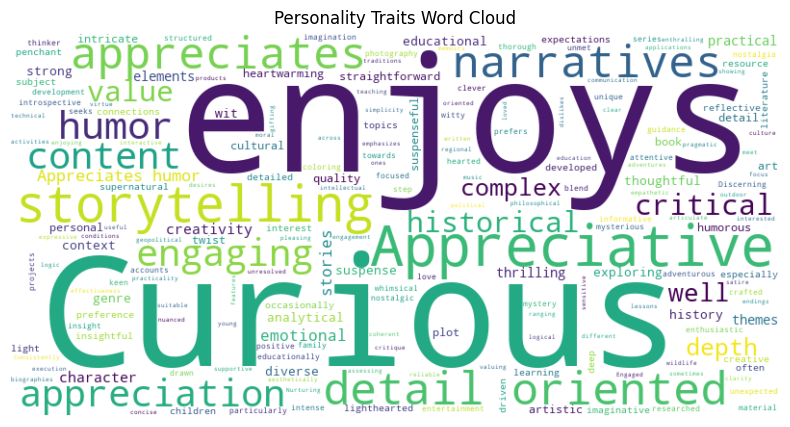

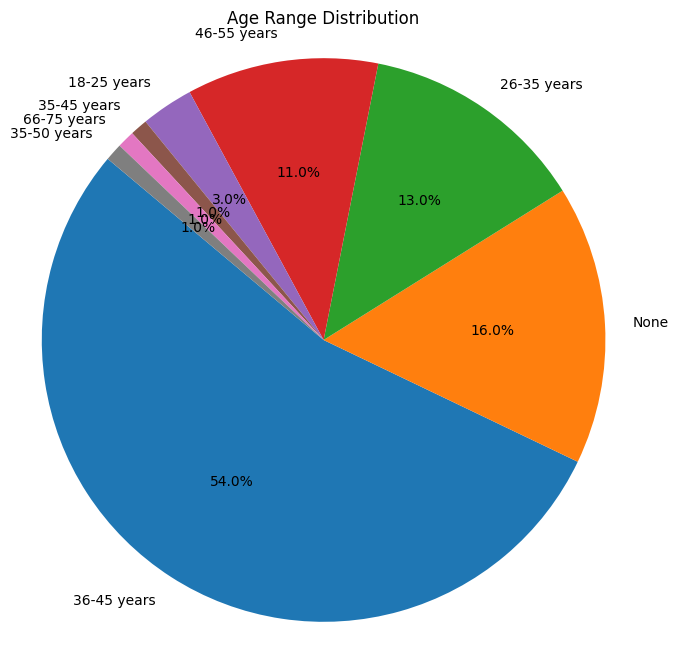

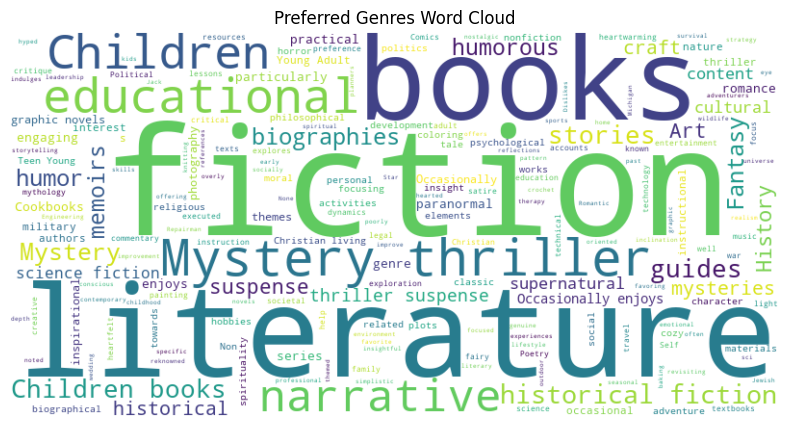

In [4]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 加载 JSONL 文件
def load_personas(file_path):
    personas = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            persona = json.loads(line.strip())
            personas.append(persona)
    return personas

# 提取指定字段内容
def extract_field(personas, field_path):
    field_values = []
    for persona in personas:
        value = persona
        for key in field_path:
            value = value.get(key, "")
            if not value:
                break
        if value:
            field_values.append(value)
    return field_values

# 生成词云
def generate_wordcloud(text_data, title):
    text = ' '.join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 生成饼图
def generate_pie_chart(data, title):
    counter = Counter(data)
    labels, sizes = zip(*counter.items())
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

# 主程序
if __name__ == "__main__":
    file_path = 'persona.jsonl'
    personas = load_personas(file_path)
    
    # 1. 生成词云 - Personality Traits
    personality_traits = extract_field(personas, ["FilledValues", "Basic Information", "Personality Traits"])
    generate_wordcloud(personality_traits, "Personality Traits Word Cloud")
    
    # 2. 生成饼图 - Age Range 分布
    age_ranges = extract_field(personas, ["FilledValues", "Basic Information", "Age Range"])
    generate_pie_chart(age_ranges, "Age Range Distribution")
    
    # 3. 生成词云 - Preferred Genres
    preferred_genres = extract_field(personas, ["FilledValues", "Content Preferences", "Preferred Genres"])
    generate_wordcloud(preferred_genres, "Preferred Genres Word Cloud")


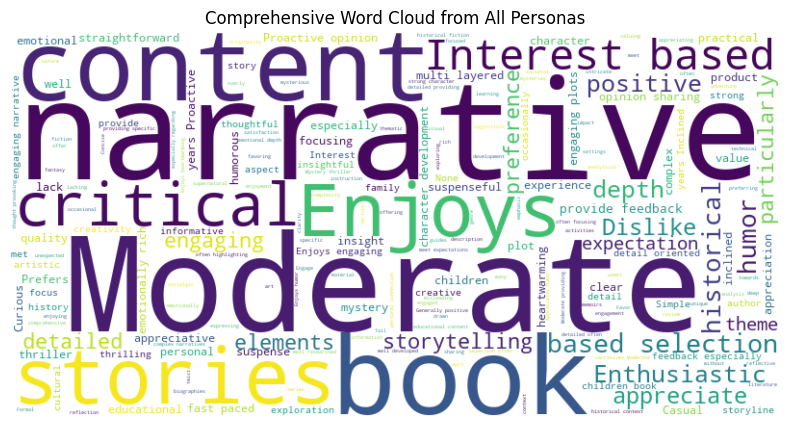

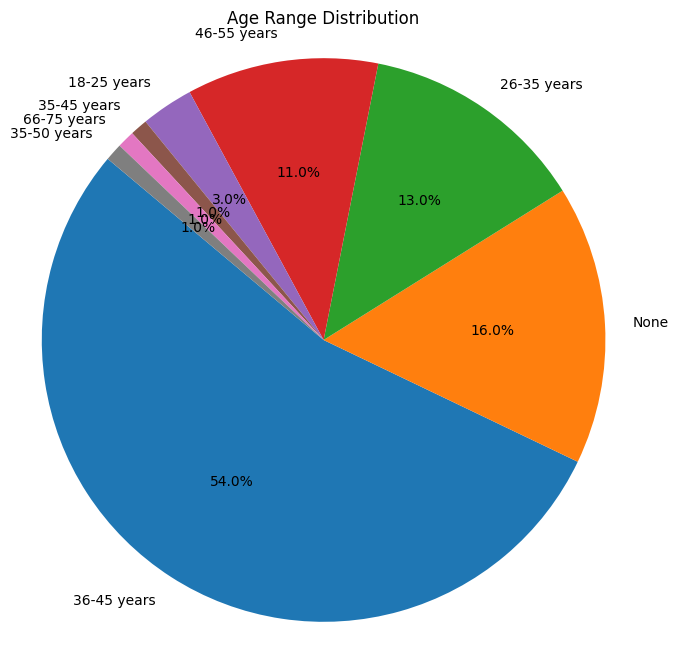

In [6]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 加载 JSONL 文件
def load_personas(file_path):
    personas = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            persona = json.loads(line.strip())
            personas.append(persona)
    return personas

# 提取 persona 中所有文本内容
def extract_all_text(personas):
    text_data = []
    
    def recursive_extract(data):
        # 递归提取嵌套字典中的所有字符串
        if isinstance(data, dict):
            for key, value in data.items():
                recursive_extract(value)
        elif isinstance(data, list):
            for item in data:
                recursive_extract(item)
        elif isinstance(data, str):
            text_data.append(data)

    for persona in personas:
        recursive_extract(persona["FilledValues"])  # 只提取 FilledValues 字段内容
    
    return text_data

# 生成词云
def generate_wordcloud(text_data, title):
    text = ' '.join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 生成饼图
def generate_pie_chart(data, title):
    counter = Counter(data)
    labels, sizes = zip(*counter.items())
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

# 主程序
if __name__ == "__main__":
    file_path = 'persona.jsonl'
    personas = load_personas(file_path)
    
    # 1. 生成词云 - 全部文本内容
    all_text_data = extract_all_text(personas)
    generate_wordcloud(all_text_data, "Comprehensive Word Cloud from All Personas")
    
    # 2. 生成饼图 - Age Range 分布
    age_ranges = [persona["FilledValues"]["Basic Information"]["Age Range"] for persona in personas]
    generate_pie_chart(age_ranges, "Age Range Distribution")


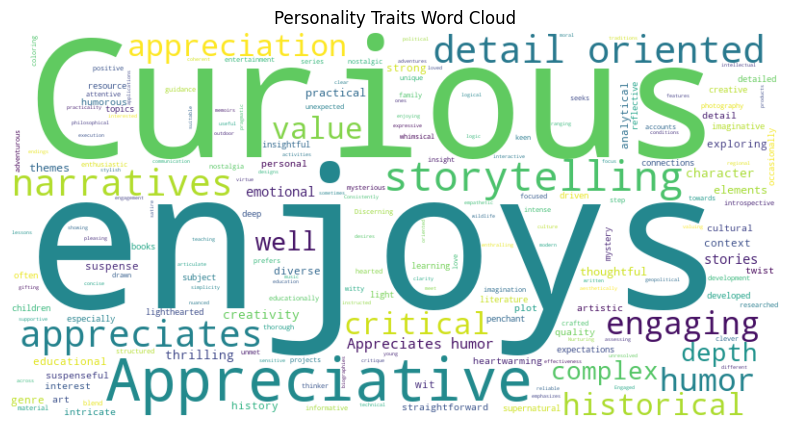

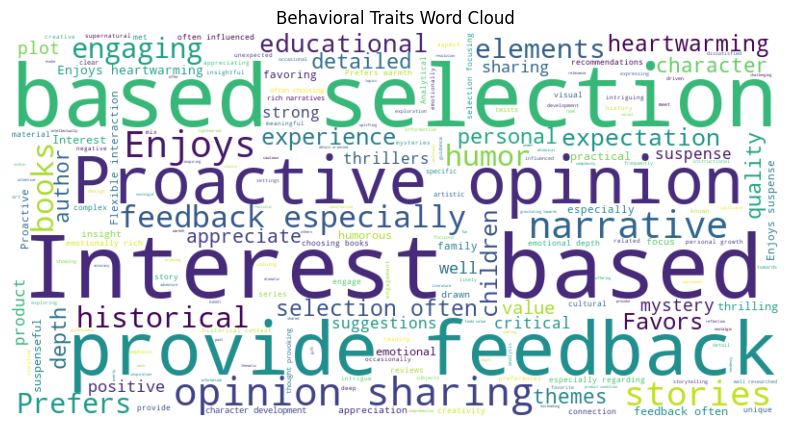

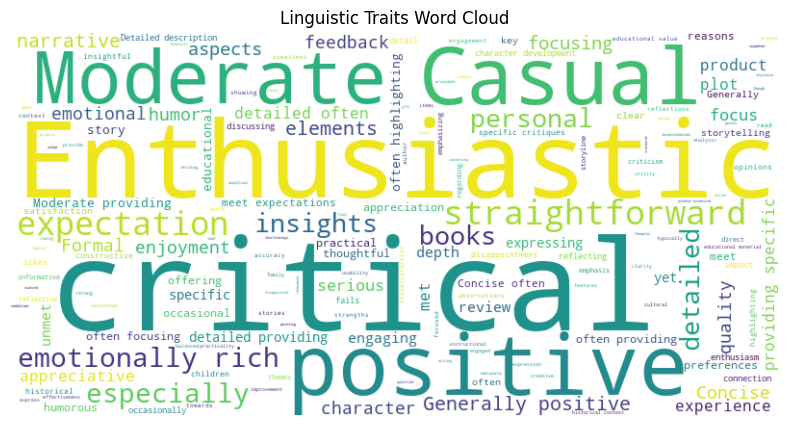

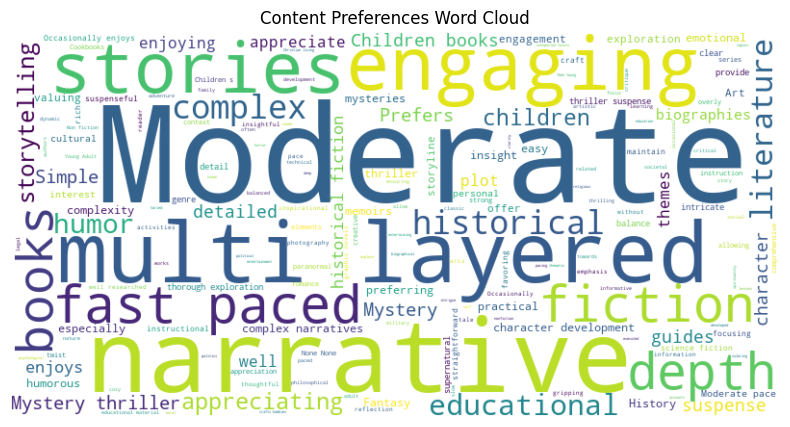

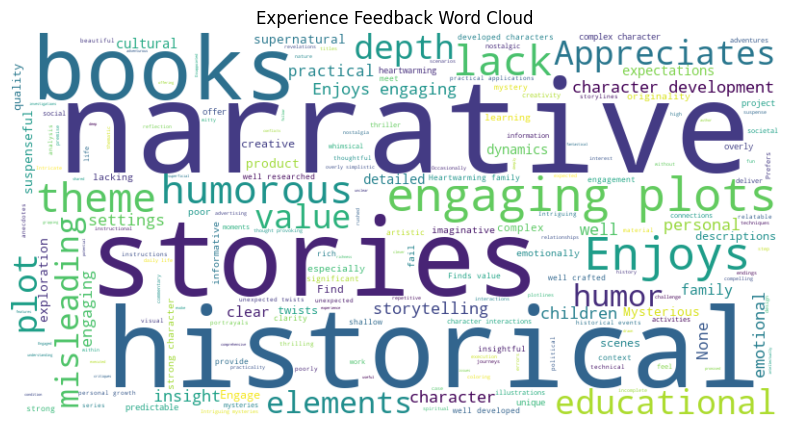

In [10]:
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 加载 JSONL 文件
def load_personas(file_path):
    personas = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            persona = json.loads(line.strip())
            personas.append(persona)
    return personas

# 提取指定字段文本数据
def extract_text_by_type(personas, field_path):
    text_data = []
    
    def recursive_extract(data):
        if isinstance(data, dict):
            for key, value in data.items():
                recursive_extract(value)
        elif isinstance(data, list):
            for item in data:
                recursive_extract(item)
        elif isinstance(data, str):
            text_data.append(data)

    for persona in personas:
        value = persona.get("FilledValues", {})
        for key in field_path:
            value = value.get(key, {})
            if not value:
                break
        if value:
            recursive_extract(value)
    
    return ' '.join(text_data)

# 生成词云
def generate_wordcloud(text_data, title, stop_words=None, extra_words=None):
    if stop_words is None:
        stop_words = set()
    
    # 合并自定义停用词和 WordCloud 自带的停用词
    stop_words = STOPWORDS.union(stop_words)

    # 将额外词汇合并到文本数据中
    if extra_words:
        text_data += ' ' + ' '.join(extra_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_data)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 主程序
if __name__ == "__main__":
    file_path = '../data/personas.jsonl'
    personas = load_personas(file_path)

    # 自定义停用词列表
    custom_stop_words = {"and", "inclined","book", "Dislike", "Dislikes","the", "preference","of", "to", "a", "for", "with", "in", "that", "when", "or", "is", "particularly", "content"}  # 添加您想去除的词加您想去除的词

    # 自定义添加的词列表
    custom_extra_words = ["Interest based selection", "engaging", "thoughtful", "mystery", "thrilling"]  # 添加您想在词云中显示的额外词汇

    # 生成词云 - 各主要类型
    # Personality Traits
    personality_text = extract_text_by_type(personas, ["Basic Information", "Personality Traits"])
    generate_wordcloud(personality_text, "Personality Traits Word Cloud", stop_words=custom_stop_words, extra_words=custom_extra_words)
    
    # Behavioral Traits
    behavioral_text = extract_text_by_type(personas, ["Behavioral Traits"])
    generate_wordcloud(behavioral_text, "Behavioral Traits Word Cloud", stop_words=custom_stop_words, extra_words=custom_extra_words)
    
    # Linguistic Traits
    linguistic_text = extract_text_by_type(personas, ["Linguistic Traits"])
    generate_wordcloud(linguistic_text, "Linguistic Traits Word Cloud", stop_words=custom_stop_words, extra_words=custom_extra_words)
    
    # Content Preferences
    content_preferences_text = extract_text_by_type(personas, ["Content Preferences"])
    generate_wordcloud(content_preferences_text, "Content Preferences Word Cloud", stop_words=custom_stop_words, extra_words=custom_extra_words)
    
    # Experience Feedback
    experience_feedback_text = extract_text_by_type(personas, ["Experience Feedback"])
    generate_wordcloud(experience_feedback_text, "Experience Feedback Word Cloud", stop_words=custom_stop_words, extra_words=custom_extra_words)


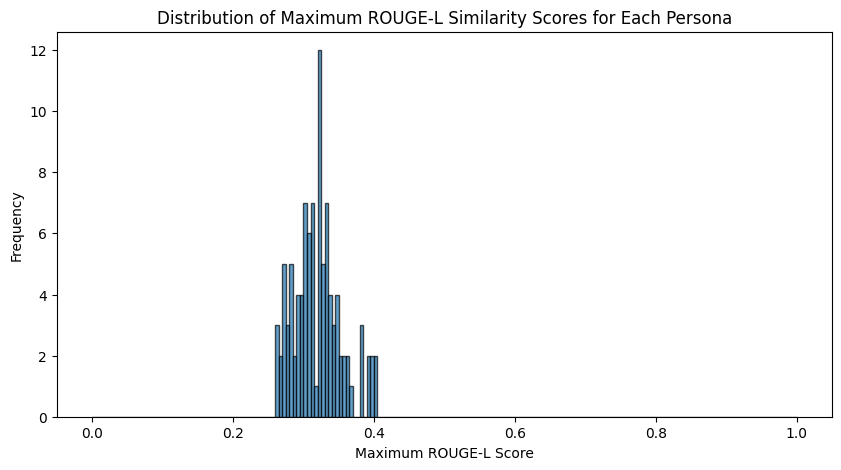

In [18]:
import json
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import random

# 加载 JSONL 文件
def load_personas(file_path):
    personas = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            persona = json.loads(line.strip())
            personas.append(persona)
    return personas

# 提取指定字段文本数据
def extract_all_text(persona):
    text_data = []
    
    def recursive_extract(data):
        if isinstance(data, dict):
            for key, value in data.items():
                recursive_extract(value)
        elif isinstance(data, list):
            for item in data:
                recursive_extract(item)
        elif isinstance(data, str):
            text_data.append(data)

    recursive_extract(persona["FilledValues"])  # 仅提取 "FilledValues" 字段中的所有文本内容
    return ' '.join(text_data)

# 计算每个 persona 的最大 ROUGE-L 分数
def calculate_max_rouge_scores(personas, sample_size=5000):
    # 调整 sample_size 以防止超过 personas 总数
    sample_size = min(sample_size, len(personas))
    
    # 随机抽样 personas
    sampled_personas = random.sample(personas, sample_size)
    texts = [extract_all_text(persona) for persona in sampled_personas]
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    max_rouge_l_scores = []

    for i, text1 in enumerate(texts):
        max_score = 0.0
        for j, text2 in enumerate(texts):
            if i != j:  # 不与自身比较
                score = scorer.score(text1, text2)['rougeL'].fmeasure
                max_score = max(max_score, score)  # 取最大分数
        max_rouge_l_scores.append(max_score)

    return max_rouge_l_scores

# 绘制最大 ROUGE-L 分数分布
def plot_max_rouge_distribution(max_scores):
    plt.figure(figsize=(10, 5))
    plt.hist(max_scores, bins=60, range=(0, 1), alpha=0.7)  # 去掉边缘线
    plt.xlabel('Maximum ROUGE-L Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Maximum ROUGE-L Similarity Scores for Each Persona')
    plt.show()


# 主程序
if __name__ == "__main__":
    file_path = 'persona.jsonl'
    personas = load_personas(file_path)

    # 计算每个 persona 的最大 ROUGE-L 分数
    max_rouge_l_scores = calculate_max_rouge_scores(personas, sample_size=100)

    # 绘制最大 ROUGE-L 分数分布图
    plot_max_rouge_distribution(max_rouge_l_scores)


In [3]:
import json
from rouge_score import rouge_scorer
import random
import pickle  # 用于保存变量

# 加载 JSONL 文件
def load_personas(file_path):
    personas = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            persona = json.loads(line.strip())
            personas.append(persona)
    return personas

# 提取指定字段文本数据
def extract_all_text(persona):
    text_data = []
    def recursive_extract(data):
        if isinstance(data, dict):
            for key, value in data.items():
                recursive_extract(value)
        elif isinstance(data, list):
            for item in data:
                recursive_extract(item)
        elif isinstance(data, str):
            text_data.append(data)

    recursive_extract(persona["FilledValues"])  # 仅提取 "FilledValues" 字段中的所有文本内容
    return ' '.join(text_data)

# 计算每个文件中 persona 的最大 ROUGE-L 分数
def calculate_max_rouge_scores(personas, sample_size=5000):
    sample_size = min(sample_size, len(personas))
    sampled_personas = random.sample(personas, sample_size)
    texts = [extract_all_text(persona) for persona in sampled_personas]
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    
    max_rouge_l_scores = []

    for i, text1 in enumerate(texts):
        max_score = 0.0
        for j, text2 in enumerate(texts):
            if i != j:  # 不与自身比较
                score = scorer.score(text1, text2)['rougeL'].fmeasure
                max_score = max(max_score, score)
        max_rouge_l_scores.append(max_score)

    return max_rouge_l_scores

# 加载 personas 文件并计算 ROUGE-L 分数
file1_path = '../personas_crs.jsonl'
file2_path = 'random_personas.jsonl'
personas_file1 = load_personas(file1_path)
personas_file2 = load_personas(file2_path)

# 计算并保存分数数据
max_rouge_l_scores_file1 = calculate_max_rouge_scores(personas_file1, sample_size=100)
max_rouge_l_scores_file2 = calculate_max_rouge_scores(personas_file2, sample_size=100)

# 保存数据到 .pkl 文件中
with open("max_rouge_scores.pkl", "wb") as f:
    pickle.dump({
        "persona_scores": max_rouge_l_scores_file1,
        "random_persona_scores": max_rouge_l_scores_file2
    }, f)

print("Scores saved successfully to max_rouge_scores.pkl")


Scores saved successfully to max_rouge_scores.pkl


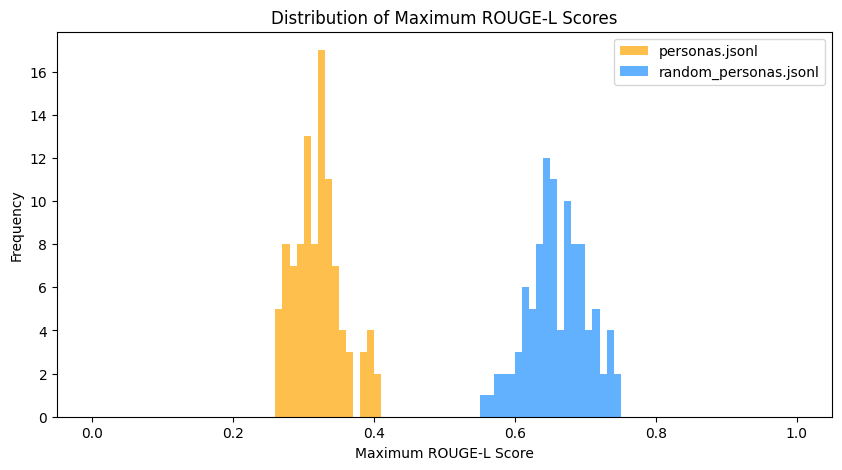

In [7]:
import matplotlib.pyplot as plt

# 假设我们有两个数据集的分数
# max_rouge_l_scores_file1 和 max_rouge_l_scores_file2 是之前计算的分数列表

# 绘制在同一张图中，调整分区数量
plt.figure(figsize=(10, 5))
plt.hist(max_rouge_l_scores_file1, bins=100, range=(0, 1), alpha=0.7, color='#FFA500', label='personas.jsonl')  # 分区数量设为 30
plt.hist(max_rouge_l_scores_file2, bins=100, range=(0, 1), alpha=0.7, color='#1E90FF', label='random_personas.jsonl')
plt.xlabel('Maximum ROUGE-L Score')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum ROUGE-L Scores')
plt.legend()
plt.show()


In [8]:
import json

# 读取并调整 JSONL 文件的结构
def adjust_structure(file_path, output_path):
    adjusted_data = []
    
    # 逐行读取 JSONL 文件
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            persona = json.loads(line.strip())
            
            # 移动 Interaction Preferences 到 Behavioral Traits
            if "Interaction Preferences" in persona["FilledValues"]["Basic Information"]:
                interaction_preferences = persona["FilledValues"]["Basic Information"].pop("Interaction Preferences")
                persona["FilledValues"].setdefault("Behavioral Traits", {})["Interaction Preferences"] = interaction_preferences
            
            # 将调整后的数据添加到列表中
            adjusted_data.append(persona)
    
    # 写入调整后的数据到新的 JSONL 文件
    with open(output_path, 'w', encoding='utf-8') as file:
        for item in adjusted_data:
            file.write(json.dumps(item, ensure_ascii=False) + "\n")

# 使用示例
input_file = "personas.jsonl"  # 输入文件路径
output_file = "newpersonas.jsonl"  # 输出文件路径
adjust_structure(input_file, output_file)

print(f"调整后的数据已保存到 {output_file}")


调整后的数据已保存到 newpersonas.jsonl
